In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
X=np.random.rand(50).astype(np.float32)
Y=0.9*X+0.55
W=tf.Variable(tf.random.normal([1]))
b=tf.Variable(tf.random.normal([1]))

In [2]:
def linear(x):
    return W*x+b

In [7]:
def mean_square(y_pred,y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true,2))/50
optimizer= tf.optimizers.SGD(0.5)

In [5]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear(X)
        loss= mean_square(pred,Y)
        
    gradients = g.gradient(loss,[W,b])
    optimizer.apply_gradients(zip(gradients,[W,b]))

In [14]:
for step in range(1,100):
    run_optimization()
    if step % 20 ==0:
        pred = linear(X)
        loss = mean_square(pred, Y)
        print("step: %i,loss:%f,W:%f,b:%f"% (step,loss,W.numpy(),b.numpy()))

step: 20,loss:0.011062,W:0.517315,b:0.739234
step: 40,loss:0.000904,W:0.790611,b:0.604092
step: 60,loss:0.000074,W:0.868732,b:0.565462
step: 80,loss:0.000006,W:0.891062,b:0.554420


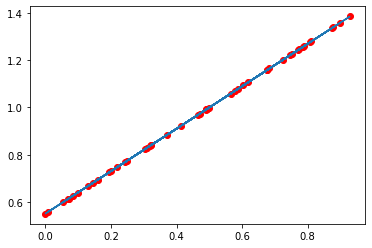

In [15]:
plt.plot(X,Y,'ro')
plt.plot(X,np.array(W*X+b))
plt.show()